In [361]:
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt  #Library for visualization

from sklearn import datasets

iris = datasets.load_iris()
X_w = iris.data[:, :2]  #load the first two features of the iris data 
y_w = iris.target         #load the target of the iris data

X = iris.data[:, :2]  #load the first two features of the iris data 
y = iris.target         #load the target of the iris data

#select only the first two classes for both the feature set and target set
#the first two classes of the iris dataset: Setosa (0), Versicolour (1)
X2 = X_w[y_w < 2]   
y2 = y_w[y_w < 2]

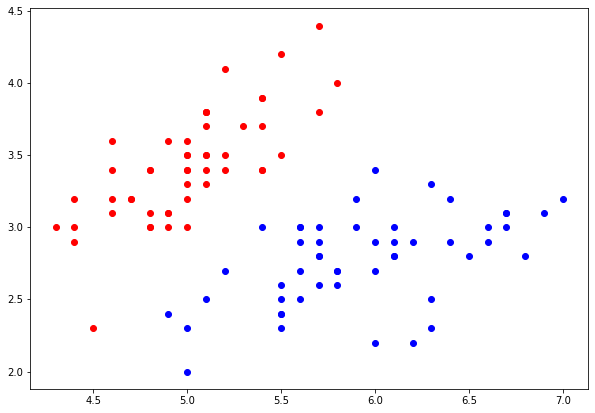

In [362]:
X_0 = X[y == 0]
X_1 = X[y == 1]
#to visualize within IPython
%matplotlib inline            
plt.figure(figsize=(10,7))   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7,stratify=y)

#split the training set into parts
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [365]:
from sklearn.svm import SVC

svm_inst = SVC(kernel='linear', random_state=7)
svm_inst.fit(X_train_2,y_train_2)

svm_inst_2 = SVC(kernel='linear')
svm_inst_2.fit(X_train,y_train)

#y_pred = svm_inst.predict(X_test_2)

SVC(kernel='linear')

In [366]:
lr_clf = LogisticRegression(random_state = 7).fit(X_train_2, y_train_2)

In [367]:
from sklearn.metrics import accuracy_score

svc_pred = svm_inst.predict(X_test_2)
lr_pred = lr_clf.predict(X_test_2)

print("Accuracy of SVC:",accuracy_score(y_test_2,svc_pred))
print("Accuracy of LR:",accuracy_score(y_test_2,lr_pred))

Accuracy of SVC: 0.8214285714285714
Accuracy of LR: 0.7857142857142857


Text(0.5, 1.0, 'Linearly-separated classes')

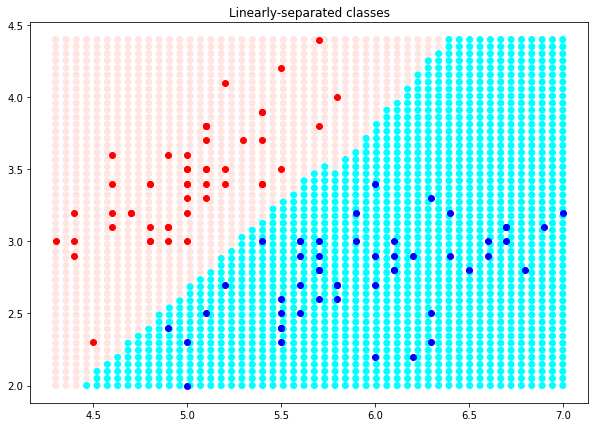

In [402]:
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X2[:, 0], [0, 100])
ymin, ymax = np.percentile(X2[:, 1], [0, 100])

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

#Predictions on the grid
test_preds = svm_inst.predict(test_points)

X_0 = X2[y2 == 0]
X_1 = X2[y2 == 1]

%matplotlib inline

colors = np.array(['mistyrose', 'aqua', 'aqua'])

plt.figure(figsize=(10,7))
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds])

#   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

#plt.scatter(X2[:, 0], X2[:, 1], color=colors[y])
plt.title("Linearly-separated classes")

Text(0.5, 1.0, 'Linearly-separated classes')

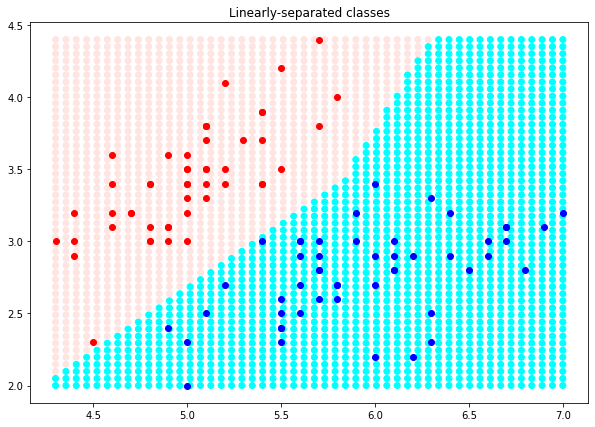

In [418]:
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X2[:, 0], [0, 100])
ymin, ymax = np.percentile(X2[:, 1], [0, 100])

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

#Predictions on the grid
test_preds = svm_inst.predict(test_points)

X_0 = X2[y2 == 0]
X_1 = X2[y2 == 1]

%matplotlib inline

colors = np.array(['mistyrose', 'aqua', 'aqua'])

plt.figure(figsize=(10,7))
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds])

#   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

#plt.scatter(X2[:, 0], X2[:, 1], color=colors[y])
plt.title("Linearly-separated classes")


test_preds = lr_clf.predict(test_points)

X_0 = X2[y2 == 0]
X_1 = X2[y2 == 1]

%matplotlib inline

colors = np.array(['mistyrose', 'aqua', 'aqua'])

plt.figure(figsize=(10,7))
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds])

#   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

#plt.scatter(X2[:, 0], X2[:, 1], color=colors[y])
plt.title("Linearly-separated classes")

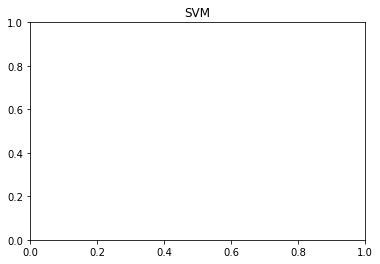

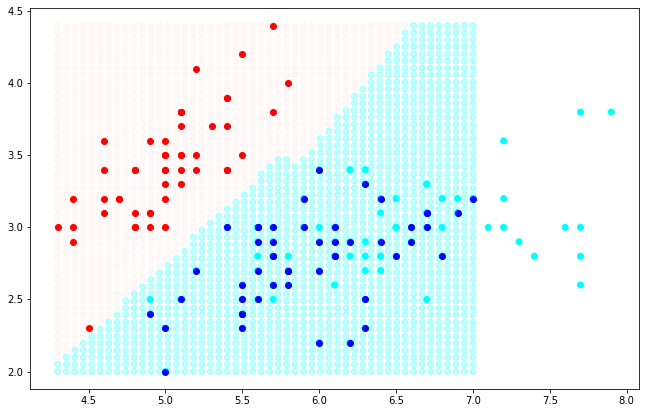

In [407]:
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X2[:, 0], [0, 100])
ymin, ymax = np.percentile(X2[:, 1], [0, 100])

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

#Predictions on the grid
test_preds = svm_inst.predict(test_points)

X_0 = X2[y2 == 0]
X_1 = X2[y2 == 1]

%matplotlib inline

colors = np.array(['mistyrose', 'aqua', 'aqua'])

plt.figure(figsize=(10,7))
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds])

#   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

#plt.scatter(X2[:, 0], X2[:, 1], color=colors[y])
plt.title("Linearly-separated classes")


#Predictions on the grid
#test_preds = svm_inst.predict(test_points)
test_preds = lr_clf.predict(test_points)

X_0 = X2[y2 == 0]
X_1 = X2[y2 == 1]

%matplotlib inline

colors = np.array(['mistyrose', 'aqua', 'aqua'])

#colors = np.array(['r', 'b'])
ax1.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
ax1.scatter(X[:, 0], X[:, 1], color=colors[y])

ax1.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax1.scatter(X_1[:,0],X_1[:,1], color = 'blue')

plt.title("SVM")

#Predictions on the grid
test_preds = svm_inst_2.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

fig = plt.figure(figsize=(24,7))
ax2 = fig.add_subplot(1, 2, 1)

ax2.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
ax2.scatter(X[:, 0], X[:, 1], color=colors[y])

ax2.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax2.scatter(X_1[:,0],X_1[:,1], color = 'blue')


Text(0.5, 1.0, 'Linear Regression')

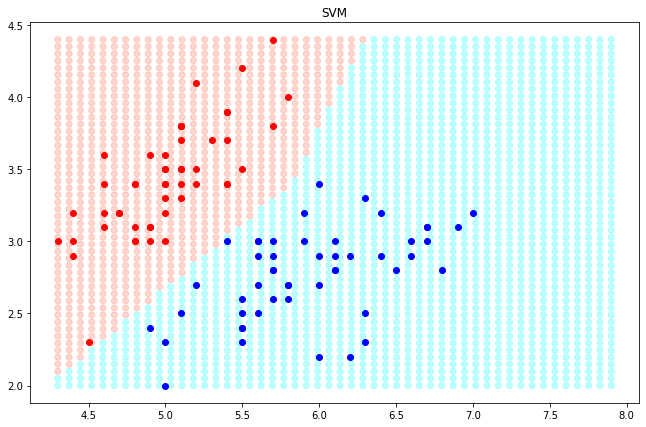

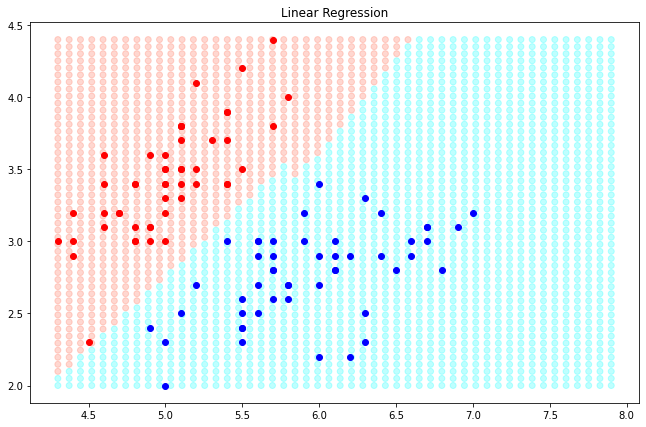

In [416]:
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

#Predictions on the grid
test_preds = lr_clf.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

%matplotlib inline
fig = plt.figure(figsize=(24,7))
ax1 = fig.add_subplot(1, 2, 1)

#colors = np.array(['aqua', 'aqua', 'rose'])
colors = np.array(['tomato', 'aqua', 'aqua'])

#colors = np.array(['r', 'b'])
ax1.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
#ax1.scatter(X[:, 0], X[:, 1], color=colors[y])

ax1.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax1.scatter(X_1[:,0],X_1[:,1], color = 'blue')

plt.title("SVM")

#Predictions on the grid
test_preds = svm_inst_2.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

fig = plt.figure(figsize=(24,7))
ax2 = fig.add_subplot(1, 2, 1)

ax2.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
#ax2.scatter(X[:, 0], X[:, 1], color=colors[y])
ax2.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax2.scatter(X_1[:,0],X_1[:,1], color = 'blue')

plt.title("Linear Regression")


In [391]:
print(len(test_points[:, 0]))
print(len(test_points[:, 1]))
print(test_preds)
print(len(test_preds))

2500
2500
[0 0 0 ... 2 2 2]
2500


In [356]:
print(len(X_0))
print(len(test_preds))
print(len(X))
print(len(X_train))
print(len(X_train_2))
print(ymin)
print(ymax)

50
2500
150
112
84
2.0
4.4


In [357]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 7).fit(X_train_2, y_train_2)

Text(0.5, 1.0, 'Linear Regression')

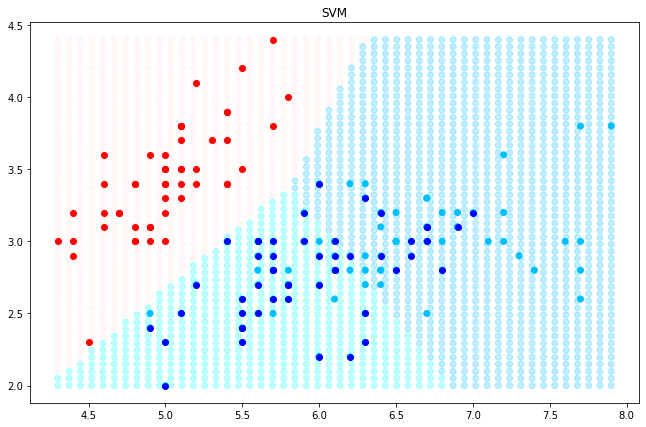

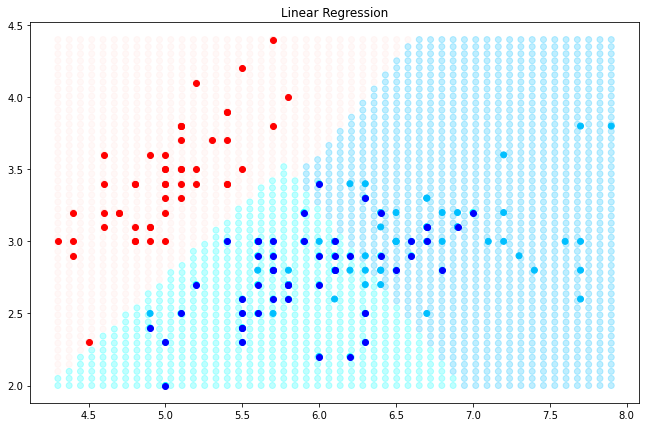

In [388]:
from itertools import product

colors = np.array(['mistyrose', 'aqua', 'deepskyblue'])

#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

#Predictions on the grid
test_preds = lr_clf.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

%matplotlib inline
#plt.figure(figsize=(10,7))   #change figure-size for easier viewing

#fig = plt.figure()
fig = plt.figure(figsize=(24,7))
ax1 = fig.add_subplot(1, 2, 1)
#fig, ax1 = plt.subplots(1,2,1,figsize=(15,15))
# plt.subplot(211)


#colors = np.array(['r', 'b'])
ax1.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
ax1.scatter(X[:, 0], X[:, 1], color=colors[y])

ax1.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax1.scatter(X_1[:,0],X_1[:,1], color = 'blue')

plt.title("SVM")

#Predictions on the grid
test_preds = svm_inst_2.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

#plt.figure(figsize=(10,7))   #change figure-size for easier viewing

#plt.subplot(212)
fig = plt.figure(figsize=(24,7))
#fig = plt.figure()
ax2 = fig.add_subplot(1, 2, 1)


#colors = np.array(['r', 'b'])
ax2.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
ax2.scatter(X[:, 0], X[:, 1], color=colors[y])

ax2.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax2.scatter(X_1[:,0],X_1[:,1], color = 'blue')


plt.title("Linear Regression")

#fig.tight_layout()
#fig.show()

In [383]:
# svm_inst = SVC(kernel='linear')
# svm_inst.fit(X_train,y_train)
# lr_clf = LogisticRegression(random_state = 7).fit(X_train, y_train)

In [384]:
from sklearn.metrics import accuracy_score

svc_pred = svm_inst.predict(X_test_2)
lr_pred = lr_clf.predict(X_test_2)

print("Accuracy of SVC:",accuracy_score(y_test_2,svc_pred))
print("Accuracy of LR:",accuracy_score(y_test_2,lr_pred))

Accuracy of SVC: 0.8214285714285714
Accuracy of LR: 0.7857142857142857
